## Homework 4: Spectrogram

In [2]:
import numpy as np
import random

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

from plotly import graph_objs as go
from plotly import express as px
import matplotlib.pyplot as plt
from scipy import fft

import warnings
warnings.filterwarnings('ignore')

In [3]:
def get_specgram(signal: np.array, t: np.array, nwindowsteps: int, window_width: int):

    plt.figure(figsize=(10, 6))

    step = (t[-1] - t[0]) / nwindowsteps
    for i in range(nwindowsteps):
        end = i*step + t[0]

        window_func = np.exp(-(t-end)**2 / 2 / window_width**2)

        windowed_signal = signal * window_func
        spectrum = np.fft.fft(windowed_signal)
        w = np.fft.fftfreq(len(windowed_signal), d=(t[1]-t[0]) / (2*np.pi))

        freq_range = np.logical_and(w > 0, w < 6)
        w = w[freq_range]        
        intensity = np.abs(spectrum[freq_range])**2
    
        plt.scatter([end] * len(w), w, c=intensity)

    plt.title("Spectrogram")
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time [sec]")

### Task 4.1

Text(0, 0.5, 'Signal, a.u.')

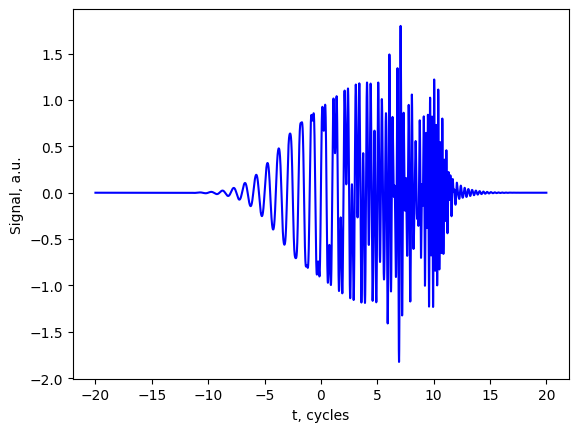

In [4]:
# generate the signal
nofts=1000
timestep = 2**14
t=np.linspace(-20*2*np.pi, 20*2*np.pi, timestep)

# 1st wave packet
y1=np.sin(t)*np.exp(-t**2/2/20**2)
# 2nd wave packet
y2=y1+np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
# 3rd wave packet
y3=y2+np.sin(5.5*t)*np.exp(-(t-10*2*np.pi)**2/2/5**2)
# 4st wave packet
y4=y3+np.sin(4*t)*np.exp(-(t-7*2*np.pi)**2/2/5**2)

# Plot Signal
plt.plot(t/2/np.pi, y4, color='blue')
plt.xlabel('t, cycles')
plt.ylabel('Signal, a.u.')

Text(0, 0.5, 'Power spectrum, a.u.')

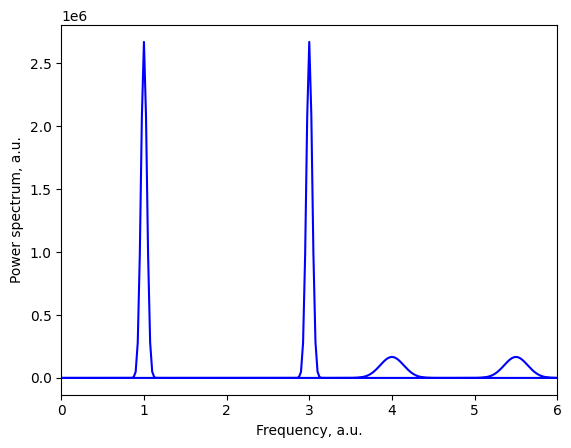

In [5]:
# Fourier spectrum
sp=fft.fft(y4)
w=fft.fftfreq(len(y4), d=(t[1]-t[0])/2/np.pi)
plt.plot(w, abs(sp)**2, color='blue')
plt.xlim(0,6)
plt.xlabel('Frequency, a.u.')
plt.ylabel('Power spectrum, a.u.')

### Task 4.2

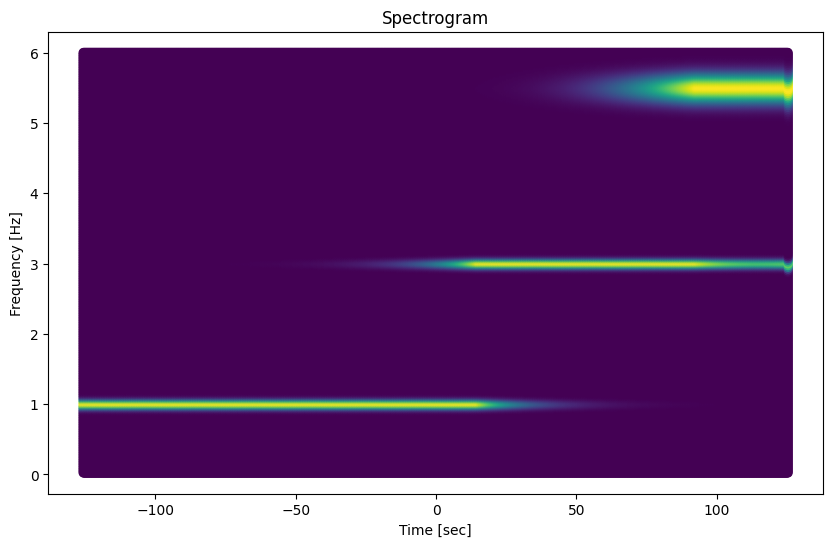

In [6]:
t=np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14, endpoint=False)

get_specgram(signal=y3, t=t, nwindowsteps=1000, window_width=25)

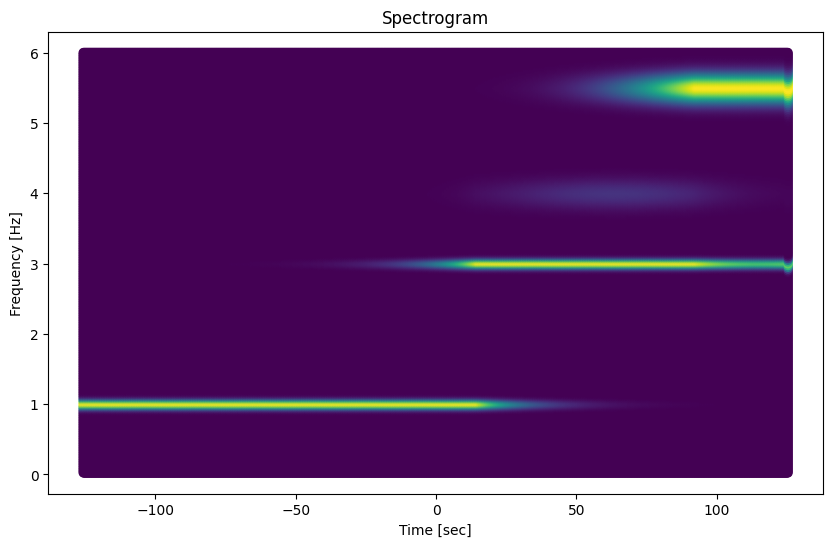

In [7]:
t=np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14, endpoint=False)

get_specgram(signal=y4, t=t, nwindowsteps=1000, window_width=25)

### Task 4.3

In [ ]:
%%timeit
t=np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14-5)
# 1st wave packet
y1=np.sin(t)*np.exp(-t**2/2/20**2)
# 2nd wave packet
y2=y1+np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
# 3rd wave packet
y3=y2+np.sin(5.5*t)*np.exp(-(t-10*2*np.pi)**2/2/5**2)
# 4st wave packet
y4=y3+np.sin(4*t)*np.exp(-(t-7*2*np.pi)**2/2/5**2)

get_specgram(signal=y4, t=t, nwindowsteps=1000, window_width=25)
plt.close()

4.58 s ± 80.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
t=np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14+5)
# 1st wave packet
y1=np.sin(t)*np.exp(-t**2/2/20**2)
# 2nd wave packet
y2=y1+np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
# 3rd wave packet
y3=y2+np.sin(5.5*t)*np.exp(-(t-10*2*np.pi)**2/2/5**2)
# 4st wave packet
y4=y3+np.sin(4*t)*np.exp(-(t-7*2*np.pi)**2/2/5**2)

get_specgram(signal=y4, t=t, nwindowsteps=1000, window_width=25)
plt.close()

4.66 s ± 69.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The time increased due to the increase of points number